# Download Market Data
This notebook shows how to download data from the Alpha Vantage website.

In [10]:
# Small support module containing my Alpha Vantage API token.
# This prevents me from accidentally uploading it to GitHub :P
import av_cred

# Alpha Vantage module
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

In [16]:
# Load the daily market data for a sample of indexes
symbols=['DJI',  # Dow Jones Industrial Average
         'SPX']  # S&P 500

ts = TimeSeries(av_cred.token, output_format='pandas')

# Loop over all symbols
markets = None
for sym in symbols:
    # Get the results from the requested symbol
    dat = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    dat_df = pd.DataFrame(dat[0])

    # If this is the first symbol make sure to 
    if markets is None:
        markets = dat_df[['4. close']]
        markets = markets.rename(columns={'4. close':sym})
    else:
        markets[sym] = dat_df['4. close']

print(markets.head())

DJI        SPX
date                             
2020-02-25  27081.3594  3128.2100
2020-02-24  27960.8008  3225.8899
2020-02-21  28992.4102  3337.7500
2020-02-20  29219.9805  3373.2300
2020-02-19  29348.0293  3386.1499


In [17]:
markets.describe()

,DJI,SPX
count,5068.000000,5068.000000
mean,14149.367654,1587.595422
std,5332.122940,601.983191
min,6547.049800,676.530000
25%,10422.944800,1153.515000
50%,12139.015150,1364.650000
75%,17101.809575,1998.470000
max,29551.419900,3386.149900


In [18]:
# Scale the data
mrkt_scaled = markets.copy()

# Import a data scaler object
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

for col in mrkt_scaled.columns:
    # Scale this column
    col_data = mrkt_scaled[col].values
    mrkt_scaled[col] = scaler.fit_transform(col_data.reshape(-1,1))

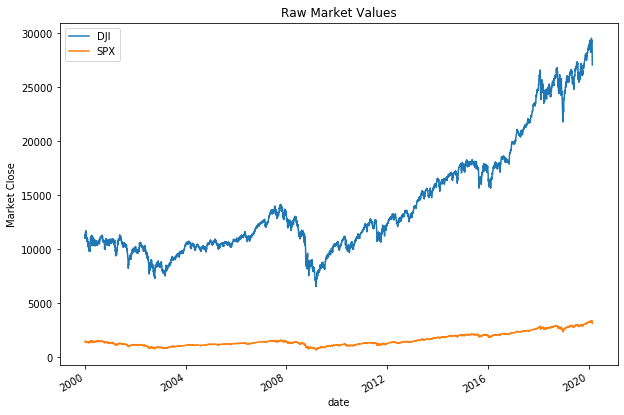

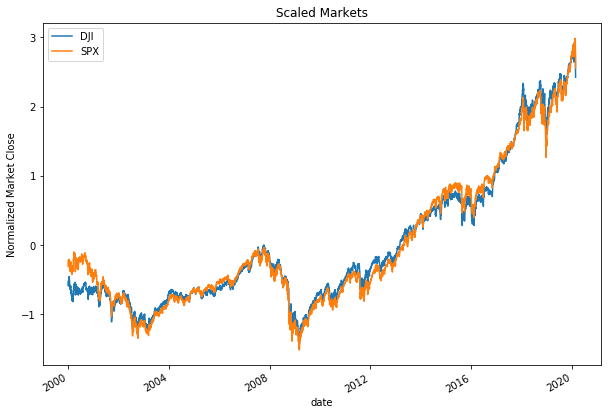

In [28]:
import matplotlib.pyplot as plt
markets.plot(title='Raw Market Values', figsize=(10,7))
plt.ylabel('Market Close');
mrkt_scaled.plot(title='Scaled Markets', figsize=(10,7))
plt.ylabel('Normalized Market Close');

In [15]:
markets.to_pickle('../data/markets.pkl')